# Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



# Data Dictionary

- survival        0 = No, 1 = Yes
- pclass	      Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    - pclass: A proxy for socio-economic status (SES)
       - 1st = Upper
       - 2nd = Middle
       - 3rd = Lower
- sex	          Sex	
- Age	          Age in years	
- sibsp	          # of siblings / spouses aboard the Titanic
    -sibsp: The dataset defines family relations in this way...
        - Sibling = brother, sister, stepbrother, stepsister
        - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch	          # of parents / children aboard the Titanic	
    - parch: The dataset defines family relations in this way...
        - Parent = mother, father
        - Child = daughter, son, stepdaughter, stepson
        - Some children travelled only with a nanny, therefore parch=0 for them.
        
- ticket	      Ticket number	
- fare	          Passenger fare	
- cabin	          Cabin number	
- embarked	      Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Import DataFiles

In [21]:
#kaggle data
train = pd.read_csv('DataSets/Kaggle/train.csv')
test = pd.read_csv('DataSets/Kaggle/test.csv')
#tensorflow dataset
titanic_complete = pd.read_csv('DataSets/TensorFlow/Titanic.csv')

In [22]:
titanic_complete.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [23]:
titanic_complete.shape

(1309, 14)

In [24]:
titanic_complete_df = pd.read_csv('DataSets/TensorFlow/Titanic.csv')
fare_sort=titanic_complete_df.sort_values("fare", ascending = True)
fare_sort.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
963,3,0,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,?,S,?,?,?
125,1,0,"Fry, Mr. Richard",male,?,0,0,112058,0,B102,S,?,?,?
410,2,0,"Frost, Mr. Anthony Wood 'Archie'",male,?,0,0,239854,0,?,S,?,?,Belfast
1254,3,1,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,?,S,15,?,?
528,2,0,"Parkes, Mr. Francis 'Frank'",male,?,0,0,239853,0,?,S,?,?,Belfast


In [25]:
fare_sort.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
155,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52,1,1,12749,93.5,B69,S,3,?,"Montreal, PQ"
230,1,1,"Perreault, Miss. Anne",female,30,0,0,12749,93.5,B73,S,3,?,?
225,1,0,"Payne, Mr. Vivian Ponsonby",male,23,0,0,12749,93.5,B24,S,?,?,"Montreal, PQ"
154,1,0,"Hays, Mr. Charles Melville",male,55,1,1,12749,93.5,B69,S,?,307,"Montreal, PQ"
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,?,?,S,?,261,?


In [26]:
titanic_complete = titanic_complete.replace('?',np.nan)
train = train.replace('?',np.nan)
test = test.replace('?',np.nan)

In [27]:
#Converting age and fare into float
titanic_complete['age'] = titanic_complete['age'].astype(float)
titanic_complete['fare'] = titanic_complete['fare'].astype(float)

## Visualizations

In [28]:
#Create Function
def bar_chart(feature):
    survived = titanic_complete[titanic_complete['survived']==1][feature].value_counts()
    perished = titanic_complete[titanic_complete['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, perished])
    df.index = ['survived','perished']
    df.plot(kind='bar', figsize=(10,5))

In [29]:
def sex_chart(feature):    
    male = titanic_complete[titanic_complete['sex']=="male"][feature].value_counts()
    female = titanic_complete[titanic_complete['sex']=="female"][feature].value_counts()
    sex_df = pd.DataFrame([male, female])
    sex_df.index = ['male', 'female']
    sex_df.plot(kind='bar', figsize=(10,5))

Text(0.5, 1.0, 'Passenger Survival by Sex')

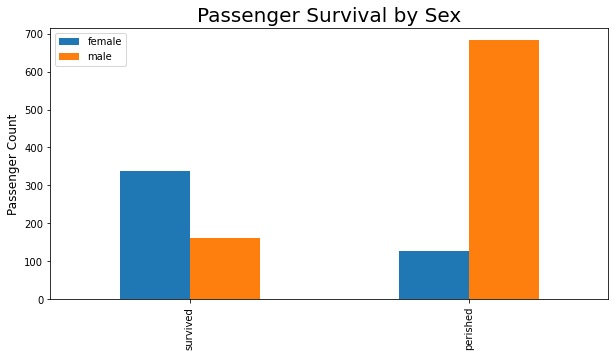

In [30]:
bar_chart("sex")
plt.ylabel("Passenger Count", fontsize=12)
plt.title("Passenger Survival by Sex", fontsize=20)


Text(0.5, 1.0, 'Passenger Survival by Ticket Class')

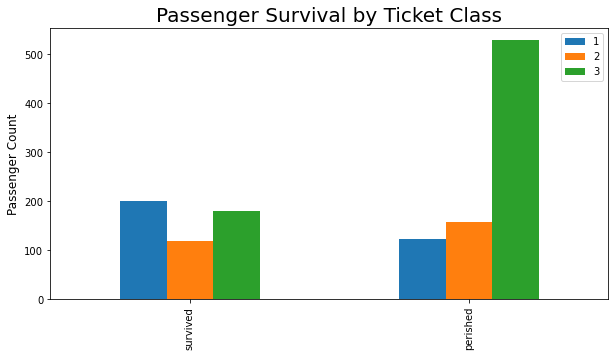

In [32]:
bar_chart("pclass")
plt.ylabel("Passenger Count", fontsize=12)
plt.title("Passenger Survival by Ticket Class", fontsize=20)

Text(0.5, 1.0, 'Passenger Survival by Port of Embarkment')

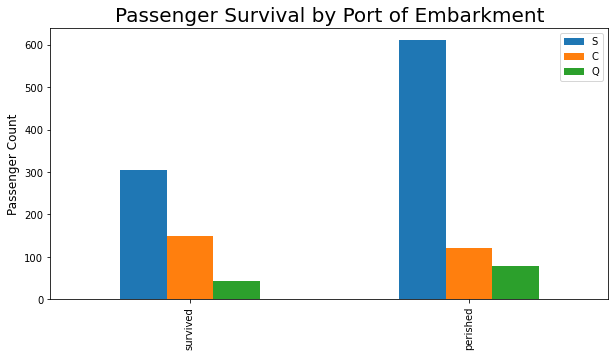

In [33]:
bar_chart("embarked")
plt.ylabel("Passenger Count", fontsize=12)
plt.title("Passenger Survival by Port of Embarkment", fontsize=20)


Text(0.5, 1.0, 'Passenger Survival by Sibling/Spouse Count')

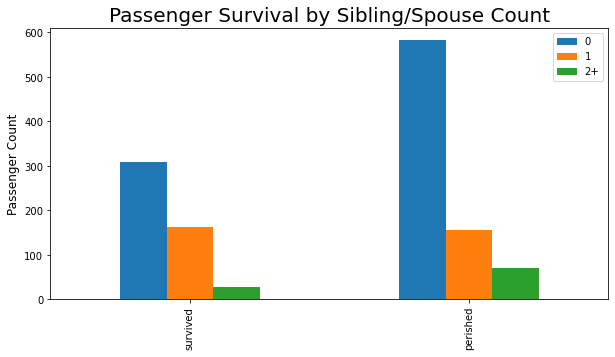

In [34]:
sibsp_bins = [-1,0,1,150]
sibsp_names = ["0", "1", "2+"]

titanic_complete["sibsp category"]=pd.cut(titanic_complete["sibsp"], sibsp_bins, labels=sibsp_names)
bar_chart("sibsp category")
plt.ylabel("Passenger Count", fontsize=12)
plt.title("Passenger Survival by Sibling/Spouse Count", fontsize=20)

Text(0.5, 1.0, 'Passenger Survival by Parent/Child Count')

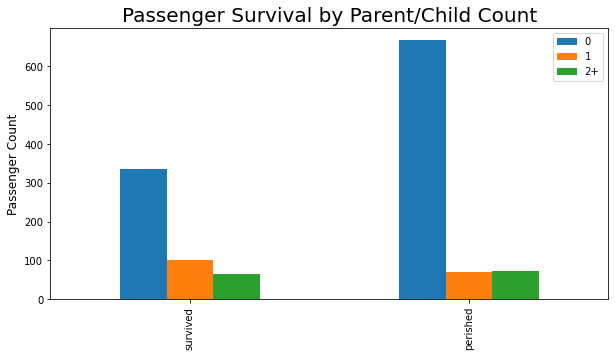

In [39]:
parch_bins = [-1,0,1,150]
parch_names = ["0", "1", "2+"]
titanic_complete["parch category"]=pd.cut(titanic_complete["parch"], parch_bins, labels=parch_names)
bar_chart("parch category")
plt.ylabel("Passenger Count", fontsize=12)
plt.title("Passenger Survival by Parent/Child Count", fontsize=20)

Text(0.5, 1.0, 'Passenger Survival by Age')

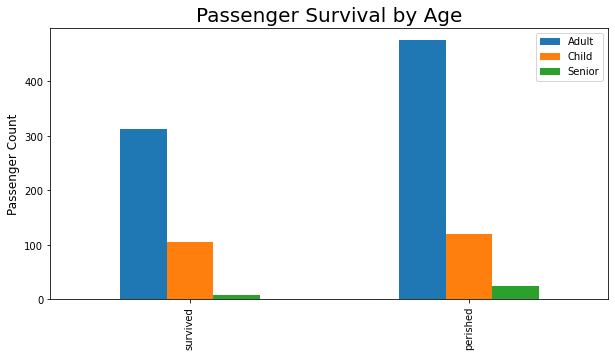

In [37]:
age_bins = [0,19,60,150]
group_names = ["Child", "Adult", "Senior"]

titanic_complete["age category"]=pd.cut(titanic_complete["age"], age_bins, labels=group_names)
bar_chart("age category")
plt.ylabel("Passenger Count", fontsize=12)
plt.title("Passenger Survival by Age", fontsize=20)

Text(0.5, 1.0, 'Passenger Survival by Fare')

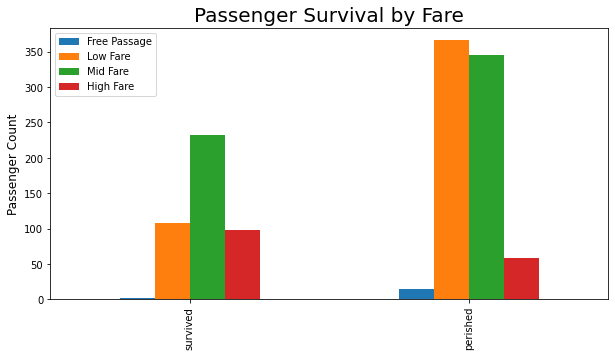

In [41]:
fare_bins = [-1, 0, 10, 50, 100]
fare_names = ["Free Passage", "Low Fare", "Mid Fare", "High Fare"]

titanic_complete["fare category"]=pd.cut(titanic_complete["fare"], fare_bins, labels=fare_names)

bar_chart("fare category")
plt.ylabel("Passenger Count", fontsize = 12)
plt.title("Passenger Survival by Fare", fontsize = 20)

# Data Cleaning

In [ ]:
# Dropping unwanted columns
titanic_complete=titanic_complete.drop(['name','cabin','body','boat','home.dest'],1)
titanic_complete

In [ ]:
# Dropping unwanted columns
train=train.drop(['Name','Cabin'],1)
train

In [ ]:
# Dropping unwanted columns
test=test.drop(['Name','Cabin'],1)
test

### Finding Missing Values('?') and Fixing them

In [ ]:
titanic_complete = titanic_complete.replace('?',np.nan)
train = train.replace('?',np.nan)
test = test.replace('?',np.nan)

In [ ]:
titanic_complete.dtypes

In [ ]:
train.dtypes

In [ ]:
test.dtypes

In [ ]:
#Converting age and fare into float
titanic_complete['age'] = titanic_complete['age'].astype(float)
titanic_complete['fare'] = titanic_complete['fare'].astype(float)
titanic_complete.dtypes

In [ ]:
#Converting age and fare into float
train['Age'] = train['Age'].astype(float)
train['Fare'] = train['Fare'].astype(float)
train['Sex'] = train['Sex'].astype(float)
train.dtypes

In [ ]:
#Converting age and fare into float
test['Age'] = test['Age'].astype(float)
test['Fare'] = test['Fare'].astype(float)
test.dtypes

In [ ]:
#View Missing Values
missing_data = titanic_complete.isnull().sum().sort_values(ascending = False)
missing_data

In [ ]:
#View Missing Values
missing_data_train = train.isnull().sum().sort_values(ascending = False)
missing_data_train

In [ ]:
#View Missing Values
missing_data_test = test.isnull().sum().sort_values(ascending = False)
missing_data_test

#### AGE

In [ ]:
# Fill the missing values with the average of all Ages - MEAN
import math
mean = titanic_complete['age'].dropna().mean()
print(mean)
titanic_complete['age'] = titanic_complete['age'].fillna(math.ceil(mean))


In [ ]:
# Fill the missing values with the average of all Ages - MEAN
mean = train['Age'].dropna().mean()
print(mean)
train['Age'] = train['Age'].fillna(math.ceil(mean))

In [ ]:
# Fill the missing values with the average of all Ages - MEAN
mean = test['Age'].dropna().mean()
print(mean)
test['Age'] = train['Age'].fillna(math.ceil(mean))

### Embarked

In [ ]:
# fill nan with Unknown - MODE
from statistics import mode
titanic_complete['embarked'] = titanic_complete['embarked'].fillna(mode(titanic_complete['embarked']))

### Fare

In [ ]:
# fill nan with the most frequent values - MODE
from statistics import mode

titanic_complete['fare'] = titanic_complete['fare'].fillna(mode(titanic_complete['fare']))


In [ ]:
#View Missing Values
missing_data = titanic_complete.isnull().sum().sort_values(ascending = False)
missing_data

## Converting Categorical Data

In [ ]:
# Use Pandas get_dummies to convert categorical data

#titanic_complete = pd.get_dummies(titanic_complete)
#titanic_complete.head()


In [ ]:
# Remove Extra Categorical Columns

## Machine Learning Using cross_val_score


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'].astype(float))
train['Embarked']=le.fit_transform(train['Embarked'].astype(float))
train.head()

In [ ]:
#Define features and target variables
features = ["Pclass", "Sex", "SibSp", "Age"]
target = "Survived"
X=train.iloc[:,1:]
Y=train['Survived'].ravel()

In [ ]:
random_state = 1
rf = RandomForestClassifier(random_state = 1)
score_rf = cross_val_score(rf, train[features], train[target], cv=5)
print("Random forest model accuracy: %0.2f" % (score_rf.mean()))


In [ ]:
random_state = 1
dt = DecisionTreeClassifier()
score_dt = cross_val_score(dt, train[features], train[target], cv=5)
print("Decision tree model accuracy: %0.2f" % (score_dt.mean()))

In [ ]:
random_state = 1
svc =SVC(kernel ="linear")
score_svc = cross_val_score(svc, train[features], train[target], cv=5)
print("Support vector machine model accuracy: %0.2f" % (score_svc.mean()))

In [ ]:
random_state = 1
lr = LogisticRegression()
score_lr = cross_val_score(lr, train[features], train[target], cv=5)
print("Logistic regression model accuracy: %0.2f" % (score_lr.mean()))

In [ ]:
random_state = 1
nb = GaussianNB()
score_nb = cross_val_score(nb, train[features], train[target], cv=5)
print("Naive Bayes model accuracy: %0.2f" % (score_nb.mean()))

In [ ]:
random_state = 1
kn = KNeighborsClassifier(n_neighbors = 4, weights = "distance")
scores_kn = cross_val_score(kn, train[features], train[target], cv=5)
print("K-nearest neighbors model accuracy: %0.2f" % (scores_kn.mean()))

In [ ]:
random_state = 1
gb =GradientBoostingClassifier(random_state = 42)
scores_gb = cross_val_score(gb, train[features], train[target], cv=5)
print("Gradient boosting model accuracy: %0.2f" % (scores_gb.mean()))

In [ ]:
#Define features and target variables
#features = ["Pclass", "Sex", "SibSp", "Age"]
features = ["Pclass", "Sex", "Age"]
target = "Survived"
X=train.iloc[:,1:]
Y=train['Survived'].ravel()


In [ ]:
#Define features and target variables
X=titanic_complete.iloc[:,1:]
Y=titanic_complete['survived'].ravel()

#Divide the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [ ]:
#Define features and target variables
X=train.iloc[:,1:]
Y=train['Survived'].ravel()


In [ ]:
#Converting age and fare into float
train['Age'] = train['Age'].astype(float)
train['Fare'] = train['Fare'].astype(float)
train.dtypes

In [ ]:
random_state = 1
model=RandomForestClassifier().fit(X, Y), 
predict = model.predict(X_test)

## Logistic Regression
Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "young" vs "old". 

These are categories that translate to probability of being a 0 or a 1.

In [ ]:
# Assign X (data) and y (target)
X = titanic_complete.drop('survived', axis = 1)
y = titanic_complete['survived']
print(X.shape, y.shape)

### Split Data into Training and Testing

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
bar_chart('Sex')

In [ ]:
bar_chart("Pclass")

In [ ]:
bar_chart("Embarked")